In [3]:
#import Dependencies
%matplotlib inline

#start python imports
import math, datetime, time, random

#Data Manipulataion
import numpy as np
import pandas as pd

#Data Visualization
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

#preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

#Machine Learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import  GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

#ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [4]:
#import train , test and submission data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

In [5]:
#view the training data
train.head(15)

PassengerId 
 Survived 
 Pclass 
 Name 
 Sex 
 Age 
 SibSp 
 Parch 
 Ticket 
 Fare 
 Cabin 
 Embarked 
 
 
 
 
 0 
 1 
 0 
 3 
 Braund, Mr. Owen Harris 
 male 
 22.0 
 1 
 0 
 A/5 21171 
 7.2500 
 NaN 
 S 
 
 
 1 
 2 
 1 
 1 
 Cumings, Mrs. John Bradley (Florence Briggs Th... 
 female 
 38.0 
 1 
 0 
 PC 17599 
 71.2833 
 C85 
 C 
 
 
 2 
 3 
 1 
 3 
 Heikkinen, Miss. Laina 
 female 
 26.0 
 0 
 0 
 STON/O2. 3101282 
 7.9250 
 NaN 
 S 
 
 
 3 
 4 
 1 
 1 
 Futrelle, Mrs. Jacques Heath (Lily May Peel) 
 female 
 35.0 
 1 
 0 
 113803 
 53.1000 
 C123 
 S 
 
 
 4 
 5 
 0 
 3 
 Allen, Mr. William Henry 
 male 
 35.0 
 0 
 0 
 373450 
 8.0500 
 NaN 
 S 
 
 
 5 
 6 
 0 
 3 
 Moran, Mr. James 
 male 
 NaN 
 0 
 0 
 330877 
 8.4583 
 NaN 
 Q 
 
 
 6 
 7 
 0 
 1 
 McCarthy, Mr. Timothy J 
 male 
 54.0 
 0 
 0 
 17463 
 51.8625 
 E46 
 S 
 
 
 7 
 8 
 0 
 3 
 Palsson, Master. Gosta Leonard 
 male 
 2.0 
 3 
 1 
 349909 
 21.0750 
 NaN 
 S 
 
 
 8 
 9 
 1 
 3 
 Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) 
 female 
 27.0 
 0 
 2 
 347742 
 11.1333 
 NaN 
 S 
 
 
 9 
 10 
 1 
 2 
 Nasser, Mrs. Nicholas (Adele Achem) 
 female 
 14.0 
 1 
 0 
 237736 
 30.0708 
 NaN 
 C 
 
 
 10 
 11 
 1 
 3 
 Sandstrom, Miss. Marguerite Rut 
 female 
 4.0 
 1 
 1 
 PP 9549 
 16.7000 
 G6 
 S 
 
 
 11 
 12 
 1 
 1 
 Bonnell, Miss. Elizabeth 
 female 
 58.0 
 0 
 0 
 113783 
 26.5500 
 C103 
 S 
 
 
 12 
 13 
 0 
 3 
 Saundercock, Mr. William Henry 
 male 
 20.0 
 0 
 0 
 A/5. 2151 
 8.0500 
 NaN 
 S 
 
 
 13 
 14 
 0 
 3 
 Andersson, Mr. Anders Johan 
 male 
 39.0 
 1 
 5 
 347082 
 31.2750 
 NaN 
 S 
 
 
 14 
 15 
 0 
 3 
 Vestrom, Miss. Hulda Amanda Adolfina 
 female 
 14.0 
 0 
 0 
 350406 
 7.8542 
 NaN 
 S

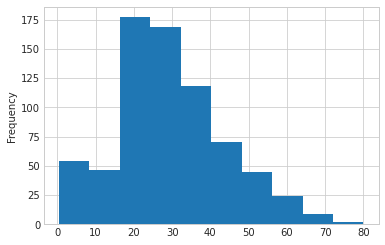

In [6]:
train.Age.plot.hist()

In [7]:
#view the test data (same columns as train data)
test.head()

PassengerId 
 Pclass 
 Name 
 Sex 
 Age 
 SibSp 
 Parch 
 Ticket 
 Fare 
 Cabin 
 Embarked 
 
 
 
 
 0 
 892 
 3 
 Kelly, Mr. James 
 male 
 34.5 
 0 
 0 
 330911 
 7.8292 
 NaN 
 Q 
 
 
 1 
 893 
 3 
 Wilkes, Mrs. James (Ellen Needs) 
 female 
 47.0 
 1 
 0 
 363272 
 7.0000 
 NaN 
 S 
 
 
 2 
 894 
 2 
 Myles, Mr. Thomas Francis 
 male 
 62.0 
 0 
 0 
 240276 
 9.6875 
 NaN 
 Q 
 
 
 3 
 895 
 3 
 Wirz, Mr. Albert 
 male 
 27.0 
 0 
 0 
 315154 
 8.6625 
 NaN 
 S 
 
 
 4 
 896 
 3 
 Hirvonen, Mrs. Alexander (Helga E Lindqvist) 
 female 
 22.0 
 1 
 1 
 3101298 
 12.2875 
 NaN 
 S

In [8]:
#view the exmaple submission data from
gender_submission.head()

PassengerId 
 Survived 
 
 
 
 
 0 
 892 
 0 
 
 
 1 
 893 
 1 
 
 
 2 
 894 
 0 
 
 
 3 
 895 
 0 
 
 
 4 
 896 
 1

In [9]:
train.describe()

PassengerId 
 Survived 
 Pclass 
 Age 
 SibSp 
 Parch 
 Fare 
 
 
 
 
 count 
 891.000000 
 891.000000 
 891.000000 
 714.000000 
 891.000000 
 891.000000 
 891.000000 
 
 
 mean 
 446.000000 
 0.383838 
 2.308642 
 29.699118 
 0.523008 
 0.381594 
 32.204208 
 
 
 std 
 257.353842 
 0.486592 
 0.836071 
 14.526497 
 1.102743 
 0.806057 
 49.693429 
 
 
 min 
 1.000000 
 0.000000 
 1.000000 
 0.420000 
 0.000000 
 0.000000 
 0.000000 
 
 
 25% 
 223.500000 
 0.000000 
 2.000000 
 20.125000 
 0.000000 
 0.000000 
 7.910400 
 
 
 50% 
 446.000000 
 0.000000 
 3.000000 
 28.000000 
 0.000000 
 0.000000 
 14.454200 
 
 
 75% 
 668.500000 
 1.000000 
 3.000000 
 38.000000 
 1.000000 
 0.000000 
 31.000000 
 
 
 max 
 891.000000 
 1.000000 
 3.000000 
 80.000000 
 8.000000 
 6.000000 
 512.329200

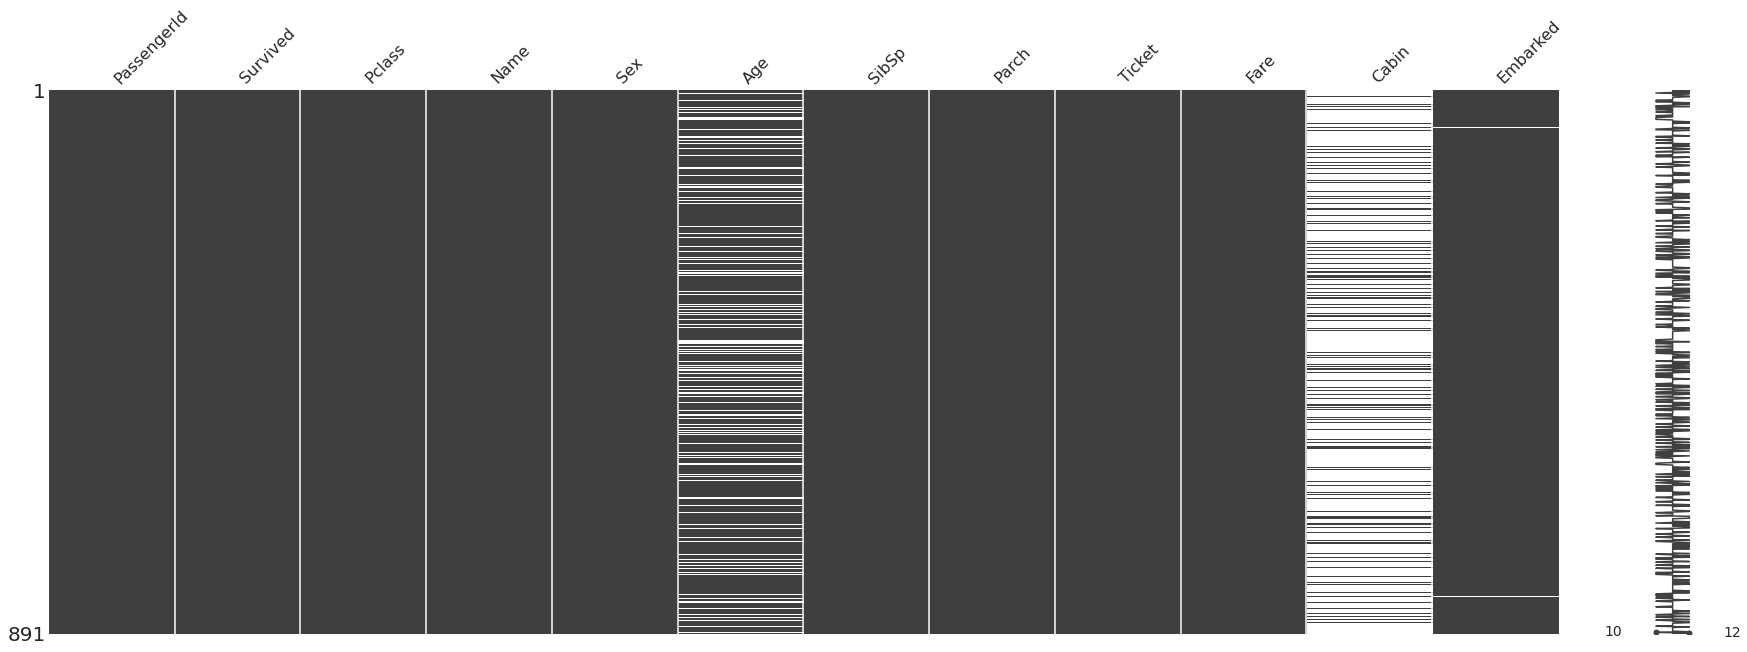

In [10]:
#plot graphic of missing values
missingno.matrix(train, figsize=(30,10))

In [11]:
#Alternatively, you can see number of missing values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df_bin = pd.DataFrame() # for discretised continouos variables
df_con = pd.DataFrame() #for continouos variables

In [13]:
#Different  Data types in dataset
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
train.head()

PassengerId 
 Survived 
 Pclass 
 Name 
 Sex 
 Age 
 SibSp 
 Parch 
 Ticket 
 Fare 
 Cabin 
 Embarked 
 
 
 
 
 0 
 1 
 0 
 3 
 Braund, Mr. Owen Harris 
 male 
 22.0 
 1 
 0 
 A/5 21171 
 7.2500 
 NaN 
 S 
 
 
 1 
 2 
 1 
 1 
 Cumings, Mrs. John Bradley (Florence Briggs Th... 
 female 
 38.0 
 1 
 0 
 PC 17599 
 71.2833 
 C85 
 C 
 
 
 2 
 3 
 1 
 3 
 Heikkinen, Miss. Laina 
 female 
 26.0 
 0 
 0 
 STON/O2. 3101282 
 7.9250 
 NaN 
 S 
 
 
 3 
 4 
 1 
 1 
 Futrelle, Mrs. Jacques Heath (Lily May Peel) 
 female 
 35.0 
 1 
 0 
 113803 
 53.1000 
 C123 
 S 
 
 
 4 
 5 
 0 
 3 
 Allen, Mr. William Henry 
 male 
 35.0 
 0 
 0 
 373450 
 8.0500 
 NaN 
 S

0    549
1    342
Name: Survived, dtype: int64


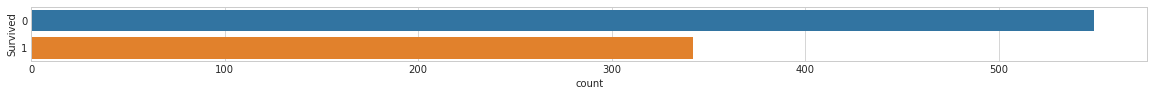

In [15]:
#how many people survived
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Survived', data=train);
print(train.Survived.value_counts())

In [16]:
#lets add this to our subset dataframe
df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

In [17]:
df_bin.head()

Survived 
 
 
 
 
 0 
 0 
 
 
 1 
 1 
 
 
 2 
 1 
 
 
 3 
 1 
 
 
 4 
 0

In [18]:
df_con.head()

Survived 
 
 
 
 
 0 
 0 
 
 
 1 
 1 
 
 
 2 
 1 
 
 
 3 
 1 
 
 
 4 
 0

## Feature: Pclass

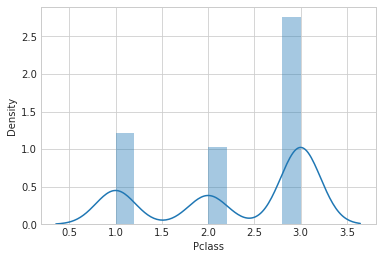

In [19]:
sns.distplot(train.Pclass);

In [20]:
train.Pclass.isnull().sum()

0

In [21]:
df_bin['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']

In [22]:
#how many differnt names are there

train.Name.value_counts()

Chapman, Mr. John Henry                         1
Lewy, Mr. Ervin G                               1
O'Leary, Miss. Hanora "Norah"                   1
Moran, Miss. Bertha                             1
Andersson, Mr. August Edvard ("Wennerstrom")    1
                                               ..
Troutt, Miss. Edwina Celia "Winnie"             1
Newell, Miss. Madeleine                         1
Sandstrom, Miss. Marguerite Rut                 1
Abbott, Mr. Rossmore Edward                     1
Harris, Mr. Walter                              1
Name: Name, Length: 891, dtype: int64

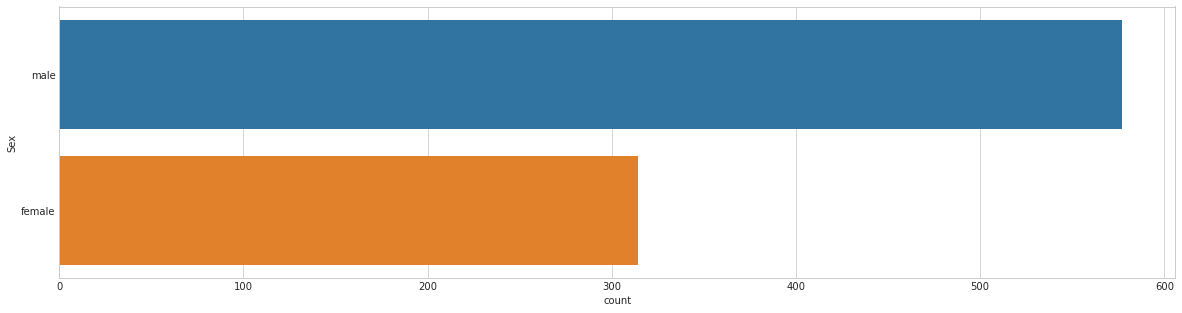

In [23]:
#lets view the distribution of sex
plt.figure(figsize=(20,5))
sns.countplot(y='Sex', data=train);

In [24]:
# are there any missing value in sex column
train.Sex.isnull().sum()

0

In [25]:
train.Sex.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [26]:
#add sex to subset dataframe
df_bin['Sex'] = train['Sex']
df_bin['Sex'] = np.where(df_bin['Sex'] == 'female',1,0) #female 0, male 1
df_con['Sex'] = train['Sex']

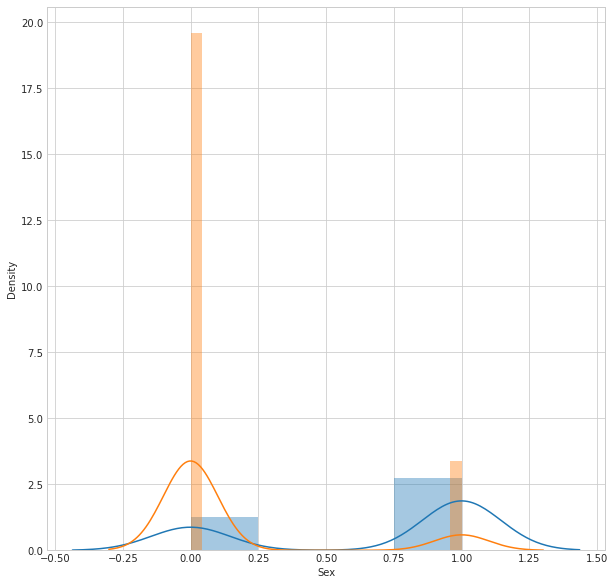

In [27]:
# how does the sex variable look compared to survival
# we can see this because they both are binary
plt.figure(figsize=(10, 10))
sns.distplot(df_bin.loc[df_bin['Survived']==1]['Sex'], kde_kws={'label': 'Survived'})
sns.distplot(df_bin.loc[df_bin['Survived']==0]['Sex'], kde_kws={'label': 'Did not survived'});

In [28]:
#how many null value is in age
train.Age.isnull().sum()

177

In [29]:
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [30]:
#add age to our sub data frame
df_bin['Age'] = pd.cut(train['Age'],10)
df_con['Age'] = train['Age']

## Function to create count and distribution visualisations

In [31]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20,5), use_bin_df=False):

    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});


## Feature: SibSp

In [32]:
train.SibSp.isnull().sum()

0

In [33]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [34]:
#add SibSp to our sub data set
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

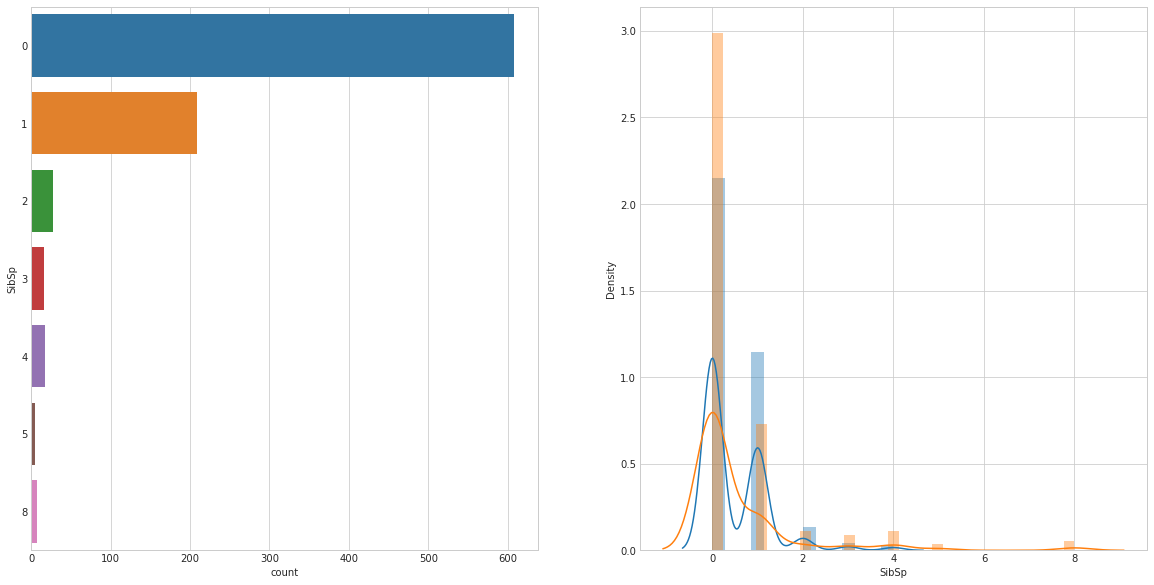

In [35]:
#visualize the count of SibSp and distribution of the values 
# against survived

plot_count_dist(train, bin_df=df_bin, label_column='Survived', target_column='SibSp',figsize=(20,10))

## Feature : Parch

In [36]:
train.Parch.isnull().sum()

0

In [37]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [38]:
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

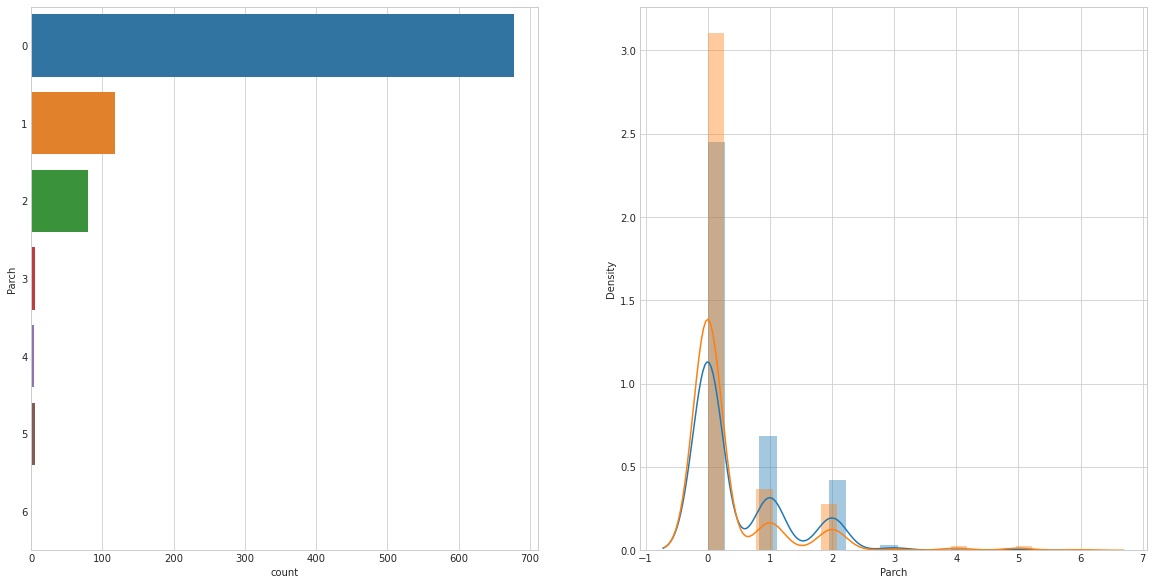

In [39]:
plot_count_dist(train, bin_df= df_bin,label_column='Survived', target_column='Parch', figsize=(20,10))

In [40]:
train.head()

PassengerId 
 Survived 
 Pclass 
 Name 
 Sex 
 Age 
 SibSp 
 Parch 
 Ticket 
 Fare 
 Cabin 
 Embarked 
 
 
 
 
 0 
 1 
 0 
 3 
 Braund, Mr. Owen Harris 
 male 
 22.0 
 1 
 0 
 A/5 21171 
 7.2500 
 NaN 
 S 
 
 
 1 
 2 
 1 
 1 
 Cumings, Mrs. John Bradley (Florence Briggs Th... 
 female 
 38.0 
 1 
 0 
 PC 17599 
 71.2833 
 C85 
 C 
 
 
 2 
 3 
 1 
 3 
 Heikkinen, Miss. Laina 
 female 
 26.0 
 0 
 0 
 STON/O2. 3101282 
 7.9250 
 NaN 
 S 
 
 
 3 
 4 
 1 
 1 
 Futrelle, Mrs. Jacques Heath (Lily May Peel) 
 female 
 35.0 
 1 
 0 
 113803 
 53.1000 
 C123 
 S 
 
 
 4 
 5 
 0 
 3 
 Allen, Mr. William Henry 
 male 
 35.0 
 0 
 0 
 373450 
 8.0500 
 NaN 
 S

In [41]:
df_con.head()

Survived 
 Pclass 
 Sex 
 Age 
 SibSp 
 Parch 
 
 
 
 
 0 
 0 
 3 
 male 
 22.0 
 1 
 0 
 
 
 1 
 1 
 1 
 female 
 38.0 
 1 
 0 
 
 
 2 
 1 
 3 
 female 
 26.0 
 0 
 0 
 
 
 3 
 1 
 1 
 female 
 35.0 
 1 
 0 
 
 
 4 
 0 
 3 
 male 
 35.0 
 0 
 0

## Feature : Ticket

In [42]:
#how many missing values ticket have
train.Ticket.isnull().sum()

0

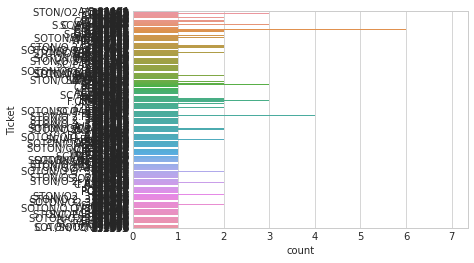

In [43]:
sns.countplot(y='Ticket', data=train)

In [44]:
train.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
CA 2144     6
347088      6
           ..
347468      1
349212      1
3101298     1
16988       1
36967       1
Name: Ticket, Length: 681, dtype: int64

In [45]:
#unique values of ticket
print('There are {} unique values of ticket'.format(len(train.Ticket.unique())))

There are 681 unique values of ticket


too many unique values of ticket so we cant add it to our data frame so we will leave it as it is

## Feature : Fare

In [46]:
#finding null value of the ticket
train.Fare.isnull().sum()

0

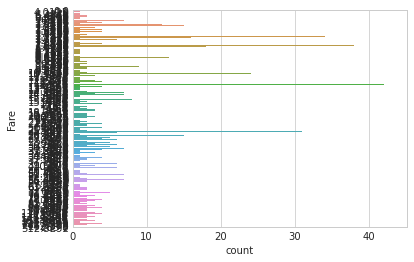

In [47]:
sns.countplot(y='Fare', data=train)

In [48]:
train.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [49]:
train.Fare.dtype

dtype('float64')

In [50]:
# let find unique values of the fare
print('There are {} many unique values of the fare'.format(len(train.Fare.unique())))

There are 248 many unique values of the fare


In [51]:
# Add Fare to our df list since it is a continoues (float data type)
df_con['Fare'] = train['Fare']
df_bin['Fare'] = pd.cut(train['Fare'],bins=5)

In [52]:
df_bin.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

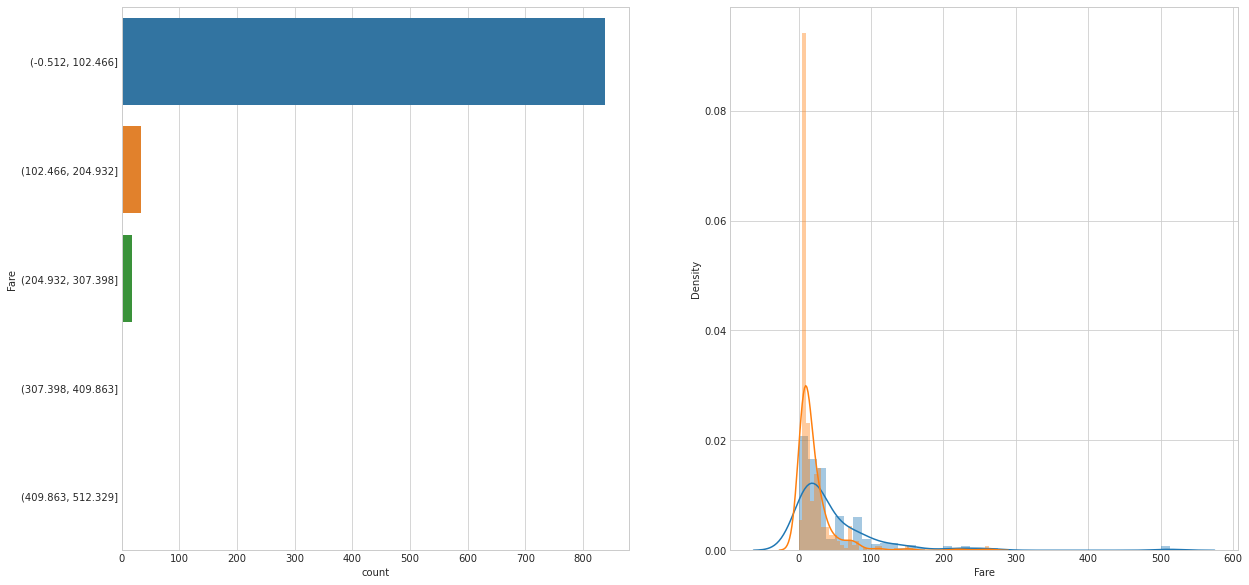

In [53]:
plot_count_dist(train, bin_df= df_bin, label_column='Survived', target_column='Fare', figsize=(20,10),use_bin_df=True)

## Feature : Cabin

In [54]:
# checking for null value in Cabin
train.Cabin.isnull().sum()

687

In [55]:
train.head()

PassengerId 
 Survived 
 Pclass 
 Name 
 Sex 
 Age 
 SibSp 
 Parch 
 Ticket 
 Fare 
 Cabin 
 Embarked 
 
 
 
 
 0 
 1 
 0 
 3 
 Braund, Mr. Owen Harris 
 male 
 22.0 
 1 
 0 
 A/5 21171 
 7.2500 
 NaN 
 S 
 
 
 1 
 2 
 1 
 1 
 Cumings, Mrs. John Bradley (Florence Briggs Th... 
 female 
 38.0 
 1 
 0 
 PC 17599 
 71.2833 
 C85 
 C 
 
 
 2 
 3 
 1 
 3 
 Heikkinen, Miss. Laina 
 female 
 26.0 
 0 
 0 
 STON/O2. 3101282 
 7.9250 
 NaN 
 S 
 
 
 3 
 4 
 1 
 1 
 Futrelle, Mrs. Jacques Heath (Lily May Peel) 
 female 
 35.0 
 1 
 0 
 113803 
 53.1000 
 C123 
 S 
 
 
 4 
 5 
 0 
 3 
 Allen, Mr. William Henry 
 male 
 35.0 
 0 
 0 
 373450 
 8.0500 
 NaN 
 S

In [56]:
train.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
F33            3
F2             3
              ..
C49            1
D50            1
C99            1
D45            1
A24            1
Name: Cabin, Length: 147, dtype: int64

## Feature: Embarked

In [57]:
# checking for missing value
train.Embarked.isnull().sum()

2

In [58]:
# what type of value of embarked has
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

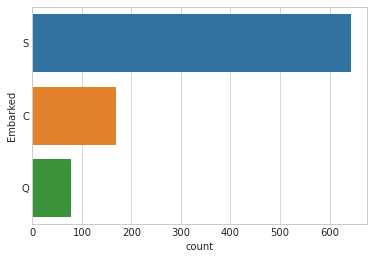

In [59]:
# displayed the visulaization
sns.countplot(y='Embarked', data=train)

In [60]:
df_bin.head()

Survived 
 Pclass 
 Sex 
 Age 
 SibSp 
 Parch 
 Fare 
 
 
 
 
 0 
 0 
 3 
 0 
 (16.336, 24.294] 
 1 
 0 
 (-0.512, 102.466] 
 
 
 1 
 1 
 1 
 1 
 (32.252, 40.21] 
 1 
 0 
 (-0.512, 102.466] 
 
 
 2 
 1 
 3 
 1 
 (24.294, 32.252] 
 0 
 0 
 (-0.512, 102.466] 
 
 
 3 
 1 
 1 
 1 
 (32.252, 40.21] 
 1 
 0 
 (-0.512, 102.466] 
 
 
 4 
 0 
 3 
 0 
 (32.252, 40.21] 
 0 
 0 
 (-0.512, 102.466]

In [61]:
# add embarked to sub dataframes
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

In [62]:
df_bin.head()

Survived 
 Pclass 
 Sex 
 Age 
 SibSp 
 Parch 
 Fare 
 Embarked 
 
 
 
 
 0 
 0 
 3 
 0 
 (16.336, 24.294] 
 1 
 0 
 (-0.512, 102.466] 
 S 
 
 
 1 
 1 
 1 
 1 
 (32.252, 40.21] 
 1 
 0 
 (-0.512, 102.466] 
 C 
 
 
 2 
 1 
 3 
 1 
 (24.294, 32.252] 
 0 
 0 
 (-0.512, 102.466] 
 S 
 
 
 3 
 1 
 1 
 1 
 (32.252, 40.21] 
 1 
 0 
 (-0.512, 102.466] 
 S 
 
 
 4 
 0 
 3 
 0 
 (32.252, 40.21] 
 0 
 0 
 (-0.512, 102.466] 
 S

In [63]:
# remove the NA value
print(len(df_con))
df_con = df_con.dropna(subset=['Embarked']) 
df_bin = df_bin.dropna(subset=['Embarked'])
print(len(df_con))

891
889


In [64]:
df_bin.head()

Survived 
 Pclass 
 Sex 
 Age 
 SibSp 
 Parch 
 Fare 
 Embarked 
 
 
 
 
 0 
 0 
 3 
 0 
 (16.336, 24.294] 
 1 
 0 
 (-0.512, 102.466] 
 S 
 
 
 1 
 1 
 1 
 1 
 (32.252, 40.21] 
 1 
 0 
 (-0.512, 102.466] 
 C 
 
 
 2 
 1 
 3 
 1 
 (24.294, 32.252] 
 0 
 0 
 (-0.512, 102.466] 
 S 
 
 
 3 
 1 
 1 
 1 
 (32.252, 40.21] 
 1 
 0 
 (-0.512, 102.466] 
 S 
 
 
 4 
 0 
 3 
 0 
 (32.252, 40.21] 
 0 
 0 
 (-0.512, 102.466] 
 S

In [65]:
# one hot encoder binned Variabels

one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)


df_bin_enc.head()

Survived 
 Pclass_1 
 Pclass_2 
 Pclass_3 
 Sex_0 
 Sex_1 
 Age_(0.34, 8.378] 
 Age_(8.378, 16.336] 
 Age_(16.336, 24.294] 
 Age_(24.294, 32.252] 
 ... 
 Parch_5 
 Parch_6 
 Fare_(-0.512, 102.466] 
 Fare_(102.466, 204.932] 
 Fare_(204.932, 307.398] 
 Fare_(307.398, 409.863] 
 Fare_(409.863, 512.329] 
 Embarked_C 
 Embarked_Q 
 Embarked_S 
 
 
 
 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 1 
 0 
 ... 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 1 
 1 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 
 
 2 
 1 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 1 
 ... 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 3 
 1 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 4 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 
 5 rows × 38 columns

In [66]:
df_con.head(10)

Survived 
 Pclass 
 Sex 
 Age 
 SibSp 
 Parch 
 Fare 
 Embarked 
 
 
 
 
 0 
 0 
 3 
 male 
 22.000000 
 1 
 0 
 7.2500 
 S 
 
 
 1 
 1 
 1 
 female 
 38.000000 
 1 
 0 
 71.2833 
 C 
 
 
 2 
 1 
 3 
 female 
 26.000000 
 0 
 0 
 7.9250 
 S 
 
 
 3 
 1 
 1 
 female 
 35.000000 
 1 
 0 
 53.1000 
 S 
 
 
 4 
 0 
 3 
 male 
 35.000000 
 0 
 0 
 8.0500 
 S 
 
 
 5 
 0 
 3 
 male 
 29.699118 
 0 
 0 
 8.4583 
 Q 
 
 
 6 
 0 
 1 
 male 
 54.000000 
 0 
 0 
 51.8625 
 S 
 
 
 7 
 0 
 3 
 male 
 2.000000 
 3 
 1 
 21.0750 
 S 
 
 
 8 
 1 
 3 
 female 
 27.000000 
 0 
 2 
 11.1333 
 S 
 
 
 9 
 1 
 2 
 female 
 14.000000 
 1 
 0 
 30.0708 
 C

In [67]:
# One Hot Encoder for catagorical Columns

df_embarked_one_hot = pd.get_dummies(df_con['Embarked'], prefix='embarked')
df_sex_one_hot  = pd.get_dummies(df_con['Sex'], prefix='sex')
df_pclass_one_hot = pd.get_dummies(df_con['Pclass'], prefix='pclass')

In [68]:
# combine the one hot with df_con_enc

df_con_enc = pd.concat([df_con,df_embarked_one_hot, df_sex_one_hot, df_pclass_one_hot], axis=1)

# drop the orignal catagorical column
df_con_enc = df_con_enc.drop(['Pclass', 'Sex','Embarked'], axis=1)

In [69]:
df_con_enc.head(20)

Survived 
 Age 
 SibSp 
 Parch 
 Fare 
 embarked_C 
 embarked_Q 
 embarked_S 
 sex_female 
 sex_male 
 pclass_1 
 pclass_2 
 pclass_3 
 
 
 
 
 0 
 0 
 22.000000 
 1 
 0 
 7.2500 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 1 
 
 
 1 
 1 
 38.000000 
 1 
 0 
 71.2833 
 1 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 
 
 2 
 1 
 26.000000 
 0 
 0 
 7.9250 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 1 
 
 
 3 
 1 
 35.000000 
 1 
 0 
 53.1000 
 0 
 0 
 1 
 1 
 0 
 1 
 0 
 0 
 
 
 4 
 0 
 35.000000 
 0 
 0 
 8.0500 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 1 
 
 
 5 
 0 
 29.699118 
 0 
 0 
 8.4583 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 1 
 
 
 6 
 0 
 54.000000 
 0 
 0 
 51.8625 
 0 
 0 
 1 
 0 
 1 
 1 
 0 
 0 
 
 
 7 
 0 
 2.000000 
 3 
 1 
 21.0750 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 1 
 
 
 8 
 1 
 27.000000 
 0 
 2 
 11.1333 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 1 
 
 
 9 
 1 
 14.000000 
 1 
 0 
 30.0708 
 1 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 
 
 10 
 1 
 4.000000 
 1 
 1 
 16.7000 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 1 
 
 
 11 
 1 
 58.000000 
 0 
 0 
 26.5500 
 0 
 0 
 1 
 1 
 0 
 1 
 0 
 0 
 
 
 12 
 0 
 20.000000 
 0 
 0 
 8.0500 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 1 
 
 
 13 
 0 
 39.000000 
 1 
 5 
 31.2750 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 1 
 
 
 14 
 0 
 14.000000 
 0 
 0 
 7.8542 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 1 
 
 
 15 
 1 
 55.000000 
 0 
 0 
 16.0000 
 0 
 0 
 1 
 1 
 0 
 0 
 1 
 0 
 
 
 16 
 0 
 2.000000 
 4 
 1 
 29.1250 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 1 
 
 
 17 
 1 
 29.699118 
 0 
 0 
 13.0000 
 0 
 0 
 1 
 0 
 1 
 0 
 1 
 0 
 
 
 18 
 0 
 31.000000 
 1 
 0 
 18.0000 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 1 
 
 
 19 
 1 
 29.699118 
 0 
 0 
 7.2250 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 1

## Start Building Machine Learning Models

## Lets Seperate the data

In [70]:
# select the data frame we want to use for prediction
selected_df = df_con_enc

In [71]:
selected_df.head()

Survived 
 Age 
 SibSp 
 Parch 
 Fare 
 embarked_C 
 embarked_Q 
 embarked_S 
 sex_female 
 sex_male 
 pclass_1 
 pclass_2 
 pclass_3 
 
 
 
 
 0 
 0 
 22.0 
 1 
 0 
 7.2500 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 1 
 
 
 1 
 1 
 38.0 
 1 
 0 
 71.2833 
 1 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 
 
 2 
 1 
 26.0 
 0 
 0 
 7.9250 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 1 
 
 
 3 
 1 
 35.0 
 1 
 0 
 53.1000 
 0 
 0 
 1 
 1 
 0 
 1 
 0 
 0 
 
 
 4 
 0 
 35.0 
 0 
 0 
 8.0500 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 1

In [72]:
# split the data frame into data and labels

X_train = selected_df.drop('Survived', axis=1) # data
y_train = selected_df.Survived  # labels

In [73]:
X_train.shape

(889, 12)

In [74]:
X_train.head()

Age 
 SibSp 
 Parch 
 Fare 
 embarked_C 
 embarked_Q 
 embarked_S 
 sex_female 
 sex_male 
 pclass_1 
 pclass_2 
 pclass_3 
 
 
 
 
 0 
 22.0 
 1 
 0 
 7.2500 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 1 
 
 
 1 
 38.0 
 1 
 0 
 71.2833 
 1 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 
 
 2 
 26.0 
 0 
 0 
 7.9250 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 1 
 
 
 3 
 35.0 
 1 
 0 
 53.1000 
 0 
 0 
 1 
 1 
 0 
 1 
 0 
 0 
 
 
 4 
 35.0 
 0 
 0 
 8.0500 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 1

In [75]:
y_train.shape

(889,)

In [76]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Function to fit machine learning algorithms

In [77]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

## Logistic Regression

In [78]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 80.43
Accuracy CV 10-Fold: 79.98
Running Time: 0:00:01.720999


## K-Nearest Neighbours

In [79]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 82.11
Accuracy CV 10-Fold: 71.09
Running Time: 0:00:00.146001


## Gaussian Naive Bayes

In [80]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 78.52
Accuracy CV 10-Fold: 78.4
Running Time: 0:00:00.074466


## Linear Support Vector Machine (SVC)

In [81]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 41.17
Accuracy CV 10-Fold: 66.59
Running Time: 0:00:00.319805


## Stocasticate Gradient Descenet

In [82]:

# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 39.03
Accuracy CV 10-Fold: 66.03
Running Time: 0:00:00.083015


## Decision Tree Classifier

In [83]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 98.2
Accuracy CV 10-Fold: 77.95
Running Time: 0:00:00.077332


## Gradient Boosting Classifier

In [84]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 89.2
Accuracy CV 10-Fold: 83.01
Running Time: 0:00:00.929447


## CatBoost Algorithms

In [85]:
# View data from Catboost model
X_train.head()

Age 
 SibSp 
 Parch 
 Fare 
 embarked_C 
 embarked_Q 
 embarked_S 
 sex_female 
 sex_male 
 pclass_1 
 pclass_2 
 pclass_3 
 
 
 
 
 0 
 22.0 
 1 
 0 
 7.2500 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 1 
 
 
 1 
 38.0 
 1 
 0 
 71.2833 
 1 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 
 
 2 
 26.0 
 0 
 0 
 7.9250 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 1 
 
 
 3 
 35.0 
 1 
 0 
 53.1000 
 0 
 0 
 1 
 1 
 0 
 1 
 0 
 0 
 
 
 4 
 35.0 
 0 
 0 
 8.0500 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 1

In [86]:
# view the label from catboost model
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [87]:
# Define Cataogrical feature for Catboost model

cat_feature = np.where(X_train.dtypes != np.float)[0]
cat_feature

#This means Catboost has picked up that all variables except Fare can be treated as categorical.

array([ 1,  2,  4,  5,  6,  7,  8,  9, 10, 11])

In [88]:
## Use the CatBoost Pool() function to pool together the training data and categorical feature labels

train_pool = Pool(X_train, y_train, cat_feature)

In [89]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [90]:
# CatBoost Model Definition

catboost_model = CatBoostClassifier(iterations=1000, custom_loss=['Accuracy'], loss_function='Logloss')

#Fit CatBoost Model
catboost_model.fit(train_pool,plot=True)

#Catboost Acuracy

acc_catboost = round(catboost_model.score(X_train, y_train)*100, 2)

Learning rate set to 0.009797
0:	learn: 0.6873212	total: 61.9ms	remaining: 1m 1s
1:	learn: 0.6829498	total: 65.1ms	remaining: 32.5s
2:	learn: 0.6779695	total: 69.8ms	remaining: 23.2s
3:	learn: 0.6723342	total: 74.2ms	remaining: 18.5s
4:	learn: 0.6666852	total: 78.3ms	remaining: 15.6s
5:	learn: 0.6611263	total: 82.5ms	remaining: 13.7s
6:	learn: 0.6558915	total: 85.3ms	remaining: 12.1s
7:	learn: 0.6502407	total: 87.8ms	remaining: 10.9s
8:	learn: 0.6443115	total: 90.5ms	remaining: 9.96s
9:	learn: 0.6413214	total: 91.5ms	remaining: 9.05s
10:	learn: 0.6364215	total: 94.1ms	remaining: 8.46s
11:	learn: 0.6309709	total: 96.7ms	remaining: 7.96s
12:	learn: 0.6264148	total: 99.3ms	remaining: 7.54s
13:	learn: 0.6212365	total: 102ms	remaining: 7.19s
14:	learn: 0.6167318	total: 105ms	remaining: 6.88s
15:	learn: 0.6118775	total: 107ms	remaining: 6.6s
16:	learn: 0.6076579	total: 110ms	remaining: 6.35s
17:	learn: 0.6051730	total: 112ms	remaining: 6.08s
18:	learn: 0.6009280	total: 114ms	remaining: 5.89s

## Perform CatBoost Cross-Validation 

In [91]:
#how much Time it will take
start_time = time.time()

# set params for cross-val as same as initial model
cv_params = catboost_model.get_params()

#Run cross val for 10 folds(as same as other model)
cv_data = cv(train_pool, cv_params, fold_count=10, plot= True)

#How long it will take 
catBoos_time  = (time.time()-start_time)


#CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean'])*100,2)

0:	learn: 0.6739220	test: 0.6745972	best: 0.6745972 (0)	total: 142ms	remaining: 2m 21s
1:	learn: 0.6613490	test: 0.6622429	best: 0.6622429 (1)	total: 326ms	remaining: 2m 42s
2:	learn: 0.6451930	test: 0.6467503	best: 0.6467503 (2)	total: 513ms	remaining: 2m 50s
3:	learn: 0.6300496	test: 0.6322710	best: 0.6322710 (3)	total: 686ms	remaining: 2m 50s
4:	learn: 0.6152964	test: 0.6187291	best: 0.6187291 (4)	total: 937ms	remaining: 3m 6s
5:	learn: 0.6013709	test: 0.6058864	best: 0.6058864 (5)	total: 1.05s	remaining: 2m 54s
6:	learn: 0.5896469	test: 0.5948912	best: 0.5948912 (6)	total: 1.22s	remaining: 2m 52s
7:	learn: 0.5777776	test: 0.5833529	best: 0.5833529 (7)	total: 1.32s	remaining: 2m 43s
8:	learn: 0.5695218	test: 0.5754409	best: 0.5754409 (8)	total: 1.47s	remaining: 2m 42s
9:	learn: 0.5587458	test: 0.5656366	best: 0.5656366 (9)	total: 1.57s	remaining: 2m 35s
10:	learn: 0.5501891	test: 0.5578115	best: 0.5578115 (10)	total: 1.69s	remaining: 2m 31s
11:	learn: 0.5415407	test: 0.5495174	best:

In [92]:
# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catBoos_time)))

---CatBoost Metrics---
Accuracy: 86.39
Accuracy cross-validation 10-Fold: 83.35
Running Time: 0:02:17.765515


## Model Results

## Regular Acuraccy Score

In [93]:
models  = pd.DataFrame({
    'Model':['KNN','Logistic Regression','Navie Bayes',
         'Stocastic Gradient Descent', 'Linear SVC',
         'Decision Tree','Gradient Boosting Tree',
         'CatBoost'],
    
    'Score':[acc_knn,
            acc_log,
            acc_gaussian,
            acc_sgd,
            acc_linear_svc,
            acc_dt,
            acc_gbt,
            acc_catboost ]
})

print('---Regualar Acuraccy Score---')
models.sort_values(by='Score', ascending=False)

---Regualar Acuraccy Score---


Model 
 Score 
 
 
 
 
 5 
 Decision Tree 
 98.20 
 
 
 6 
 Gradient Boosting Tree 
 89.20 
 
 
 7 
 CatBoost 
 86.39 
 
 
 0 
 KNN 
 82.11 
 
 
 1 
 Logistic Regression 
 80.43 
 
 
 2 
 Navie Bayes 
 78.52 
 
 
 4 
 Linear SVC 
 41.17 
 
 
 3 
 Stocastic Gradient Descent 
 39.03

In [94]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_catboost
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


Model 
 Score 
 
 
 
 
 7 
 CatBoost 
 83.35 
 
 
 6 
 Gradient Boosting Trees 
 83.01 
 
 
 1 
 Logistic Regression 
 79.98 
 
 
 2 
 Naive Bayes 
 78.40 
 
 
 5 
 Decision Tree 
 77.95 
 
 
 0 
 KNN 
 71.09 
 
 
 4 
 Linear SVC 
 66.59 
 
 
 3 
 Stochastic Gradient Decent 
 66.03

## Feature Importance
Which features of the best model were most important for making predictions?

In [95]:
# Feature Importance
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    #plt.savefig('catboost_feature_importance.png')

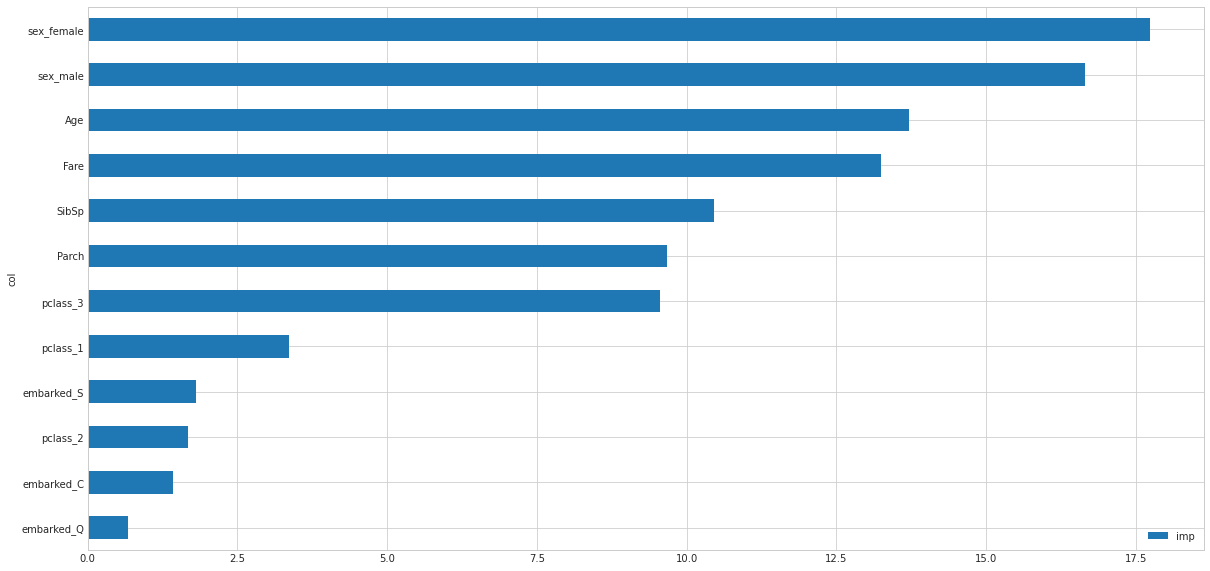

In [96]:
feature_importance(catboost_model, X_train)

## Precision and Recall

In [97]:
metrics = ['Precision', 'Recall', 'F1','AUC']

eval_metrics = catboost_model.eval_metrics(train_pool, metrics=metrics, plot=True)


for metrics in metrics:
    print(str(metrics)+":{}".format(np.mean(eval_metrics[metrics])))

Precision:0.8649477793872391
Recall:0.7150294117647058
F1:0.7826411832739438
AUC:0.9019617914925533


## Submission

In [98]:
# we need our test data frame to look like this one
X_train.head()

Age 
 SibSp 
 Parch 
 Fare 
 embarked_C 
 embarked_Q 
 embarked_S 
 sex_female 
 sex_male 
 pclass_1 
 pclass_2 
 pclass_3 
 
 
 
 
 0 
 22.0 
 1 
 0 
 7.2500 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 1 
 
 
 1 
 38.0 
 1 
 0 
 71.2833 
 1 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 
 
 2 
 26.0 
 0 
 0 
 7.9250 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 1 
 
 
 3 
 35.0 
 1 
 0 
 53.1000 
 0 
 0 
 1 
 1 
 0 
 1 
 0 
 0 
 
 
 4 
 35.0 
 0 
 0 
 8.0500 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 1

In [99]:
#our test data frame has columns our model has been trained on
test.head()

PassengerId 
 Pclass 
 Name 
 Sex 
 Age 
 SibSp 
 Parch 
 Ticket 
 Fare 
 Cabin 
 Embarked 
 
 
 
 
 0 
 892 
 3 
 Kelly, Mr. James 
 male 
 34.5 
 0 
 0 
 330911 
 7.8292 
 NaN 
 Q 
 
 
 1 
 893 
 3 
 Wilkes, Mrs. James (Ellen Needs) 
 female 
 47.0 
 1 
 0 
 363272 
 7.0000 
 NaN 
 S 
 
 
 2 
 894 
 2 
 Myles, Mr. Thomas Francis 
 male 
 62.0 
 0 
 0 
 240276 
 9.6875 
 NaN 
 Q 
 
 
 3 
 895 
 3 
 Wirz, Mr. Albert 
 male 
 27.0 
 0 
 0 
 315154 
 8.6625 
 NaN 
 S 
 
 
 4 
 896 
 3 
 Hirvonen, Mrs. Alexander (Helga E Lindqvist) 
 female 
 22.0 
 1 
 1 
 3101298 
 12.2875 
 NaN 
 S

In [100]:
#One Hot Encode the columns of test to look like (X_train)

test_embarked_one_hot = pd.get_dummies(test['Embarked'], prefix='embarked')

test_sex_one_hot  = pd.get_dummies(test['Sex'], prefix='sex')

test_pclass_one_hot = pd.get_dummies(test['Pclass'], prefix='pclass')

In [101]:
test = pd.concat([test, test_embarked_one_hot, test_sex_one_hot, test_pclass_one_hot], axis=1)

In [102]:
test.head()

PassengerId 
 Pclass 
 Name 
 Sex 
 Age 
 SibSp 
 Parch 
 Ticket 
 Fare 
 Cabin 
 Embarked 
 embarked_C 
 embarked_Q 
 embarked_S 
 sex_female 
 sex_male 
 pclass_1 
 pclass_2 
 pclass_3 
 
 
 
 
 0 
 892 
 3 
 Kelly, Mr. James 
 male 
 34.5 
 0 
 0 
 330911 
 7.8292 
 NaN 
 Q 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 1 
 
 
 1 
 893 
 3 
 Wilkes, Mrs. James (Ellen Needs) 
 female 
 47.0 
 1 
 0 
 363272 
 7.0000 
 NaN 
 S 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 1 
 
 
 2 
 894 
 2 
 Myles, Mr. Thomas Francis 
 male 
 62.0 
 0 
 0 
 240276 
 9.6875 
 NaN 
 Q 
 0 
 1 
 0 
 0 
 1 
 0 
 1 
 0 
 
 
 3 
 895 
 3 
 Wirz, Mr. Albert 
 male 
 27.0 
 0 
 0 
 315154 
 8.6625 
 NaN 
 S 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 1 
 
 
 4 
 896 
 3 
 Hirvonen, Mrs. Alexander (Helga E Lindqvist) 
 female 
 22.0 
 1 
 1 
 3101298 
 12.2875 
 NaN 
 S 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 1

The columns in test have been converted to the same format at df_con_enc. Now we can make predictions on the test dataframe columns we built a model on.

We can find the columns we made predictions on with X_train.columns.

In [103]:
# Create a list of columns to be used for the predictions
wanted_test_columns = X_train.columns
wanted_test_columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'embarked_C', 'embarked_Q',
       'embarked_S', 'sex_female', 'sex_male', 'pclass_1', 'pclass_2',
       'pclass_3'],
      dtype='object')

In [104]:
# Make prediciton using catBoost model
prediction = catboost_model.predict(test[wanted_test_columns])

In [105]:
prediction[:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0])

In [106]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = prediction # our model predictions on the test dataset
submission.head()

PassengerId 
 Survived 
 
 
 
 
 0 
 892 
 0 
 
 
 1 
 893 
 0 
 
 
 2 
 894 
 0 
 
 
 3 
 895 
 0 
 
 
 4 
 896 
 0

In [107]:
# What does our submission have to look like?
gender_submission.head()

PassengerId 
 Survived 
 
 
 
 
 0 
 892 
 0 
 
 
 1 
 893 
 1 
 
 
 2 
 894 
 0 
 
 
 3 
 895 
 0 
 
 
 4 
 896 
 1

In [108]:
# Let's convert our submission dataframe 'Survived' column to ints
submission['Survived'] = submission['Survived'].astype(int)
print('Converted Survived column to integers.')

Converted Survived column to integers.


In [109]:
# How does our submission dataframe look?
submission.head()

PassengerId 
 Survived 
 
 
 
 
 0 
 892 
 0 
 
 
 1 
 893 
 0 
 
 
 2 
 894 
 0 
 
 
 3 
 895 
 0 
 
 
 4 
 896 
 0

In [110]:
# Are our test and submission dataframes the same length?
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [111]:
submission.head()

PassengerId 
 Survived 
 
 
 
 
 0 
 892 
 0 
 
 
 1 
 893 
 0 
 
 
 2 
 894 
 0 
 
 
 3 
 895 
 0 
 
 
 4 
 896 
 0

In [112]:
submission.to_csv('catboost_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [113]:
submissions_check = pd.read_csv("catboost_submission.csv")
submissions_check.head()

PassengerId 
 Survived 
 
 
 
 
 0 
 892 
 0 
 
 
 1 
 893 
 0 
 
 
 2 
 894 
 0 
 
 
 3 
 895 
 0 
 
 
 4 
 896 
 0